In [1]:
 from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Offset indices by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 3.0274 - accuracy: 0.3714 - val_loss: 1.7187 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5226 - accuracy: 0.6931 - val_loss: 1.3367 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1088 - accuracy: 0.7723 - val_loss: 1.1558 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8737 - accuracy: 0.8191 - val_loss: 1.0566 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6835 - accuracy: 0.8579 - val_loss: 0.9772 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5633 - accuracy: 0.8864 - val_loss: 0.9245 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4270 - accuracy: 0.9132 - val_loss: 0.9133 - val_accuracy: 0.8110
Epoch 8/20
16

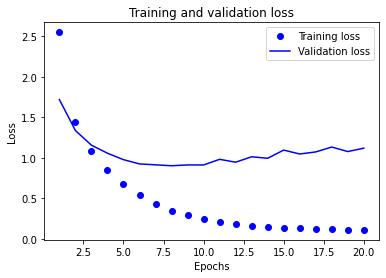

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

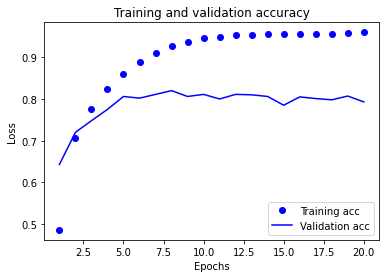

In [16]:
plt.clf() # clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
              partial_y_train,
              epochs=8,
              batch_size=512,
              validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 33ms/step - loss: 3.1712 - accuracy: 0.3738 - val_loss: 1.7617 - val_accuracy: 0.6400
Epoch 2/8
16/16 [==============================] - 0s 20ms/step - loss: 1.5414 - accuracy: 0.6965 - val_loss: 1.3295 - val_accuracy: 0.7100
Epoch 3/8
16/16 [==============================] - 0s 16ms/step - loss: 1.1216 - accuracy: 0.7621 - val_loss: 1.1550 - val_accuracy: 0.7490
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8791 - accuracy: 0.8115 - val_loss: 1.0424 - val_accuracy: 0.7840
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.6917 - accuracy: 0.8529 - val_loss: 0.9687 - val_accuracy: 0.7990
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5454 - accuracy: 0.8913 - val_loss: 0.9233 - val_accuracy: 0.8120
Epoch 7/8
16/16 [==============================] - 0s 21ms/step - loss: 0.4433 - accuracy: 0.9164 - val_loss: 0.8974 - val_accuracy: 0.8190
Epoch 8/8
71/71 [===

In [18]:
results

[0.9679279923439026, 0.7902938723564148]

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18699910952804988

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])

3

In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.0341 - accuracy: 0.3879 - val_loss: 1.8484 - val_accuracy: 0.5700
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.7290 - accuracy: 0.5892 - val_loss: 1.5927 - val_accuracy: 0.5930
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.4586 - accuracy: 0.6164 - val_loss: 1.5204 - val_accuracy: 0.6100
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3213 - accuracy: 0.6358 - val_loss: 1.4618 - val_accuracy: 0.6250
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2469 - accuracy: 0.6423 - val_loss: 1.4617 - val_accuracy: 0.6220
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1487 - accuracy: 0.6544 - val_loss: 1.4912 - val_accuracy: 0.6220
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0976 - accuracy: 0.6479 - val_loss: 1.4560 - val_accuracy: 0.6290
Epoch 8/20
63/63 [=